In [12]:
import pandas as pd

from geopy.geocoders import Nominatim

# Загрузка данных

In [13]:
%%capture
!wget https://www.dropbox.com/s/64ol9q9ssggz6f1/data_ford_price.xlsx

In [14]:
data = pd.read_excel('Data/data_ford_price.xlsx') 

# Обработка географических данных

In [15]:
geolocator = Nominatim(user_agent="geoapiExercises")

In [16]:
Latitude = str(data['lat'][0])
Longitude =  str(data['long'][0])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

Fort Henry Drive, Kingsport, Sullivan County, Tennessee, 37663, United States


In [17]:
# Теперь получим информацию из данного списка и преобразуем её в словарь с помощью функции raw():

address = location.raw['address']
address

{'road': 'Fort Henry Drive',
 'city': 'Kingsport',
 'county': 'Sullivan County',
 'state': 'Tennessee',
 'ISO3166-2-lvl4': 'US-TN',
 'postcode': '37663',
 'country': 'United States',
 'country_code': 'us'}

###  Задание 7.2
Найдите почтовый код пятого объекта выборки.

In [22]:
Latitude = str(data['lat'][5])
Longitude =  str(data['long'][5])
location = geolocator.reverse(Latitude+","+Longitude)
print(location)

E&J Motors, Southeast Washington Street, Montavilla, Portland, Multnomah County, Oregon, 98215, United States


# Отрисовка карты

In [18]:
#!pip install geopandas
#!pip install shapely

In [19]:
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import matplotlib.pyplot as plt

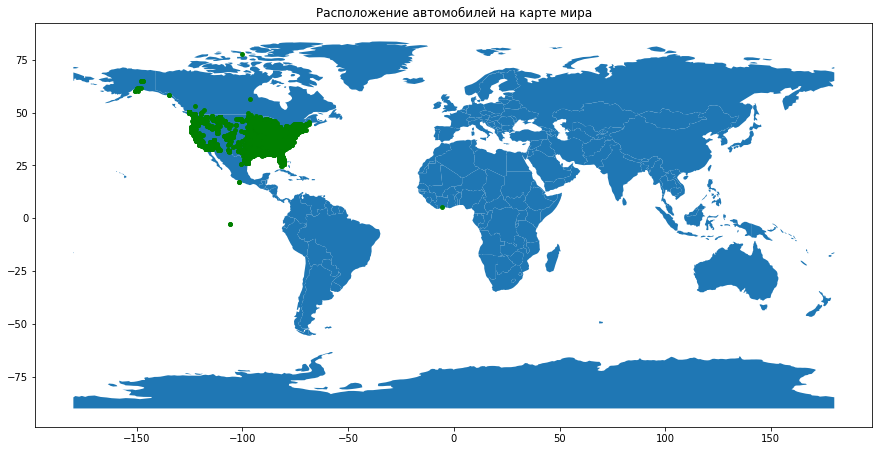

In [20]:
geometry = [Point(xy) for xy in zip(data['long'], data['lat'])]
gdf = GeoDataFrame(data, geometry=geometry)  
 
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(15, 15)), marker='o', color='green', markersize=15)
 
plt.title('Расположение автомобилей на карте мира')
plt.show()

In [21]:
# С помощью Plotly мы можем построить интерактивную карту и отследить изменение цены автомобиля 
# в зависимости от его локации:

import plotly.express as px
 
fig = px.scatter_geo(data,lat='lat',lon='long', hover_name="price")
fig.update_layout(title = 'Интерактивная карта цены автомобиля в зависимости от локации', title_x=1)
fig.show()